<a href="https://colab.research.google.com/github/amit11021509479/Energy_Consumption.ipynb/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
!pip install ydata-profiling

# Set plot style
sns.set(color_codes=True)

plt.rcParams['figure.figsize']=15,8
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Sample_Submission.csv')
df_t = pd.read_csv('/content/Sample_Submission.csv')

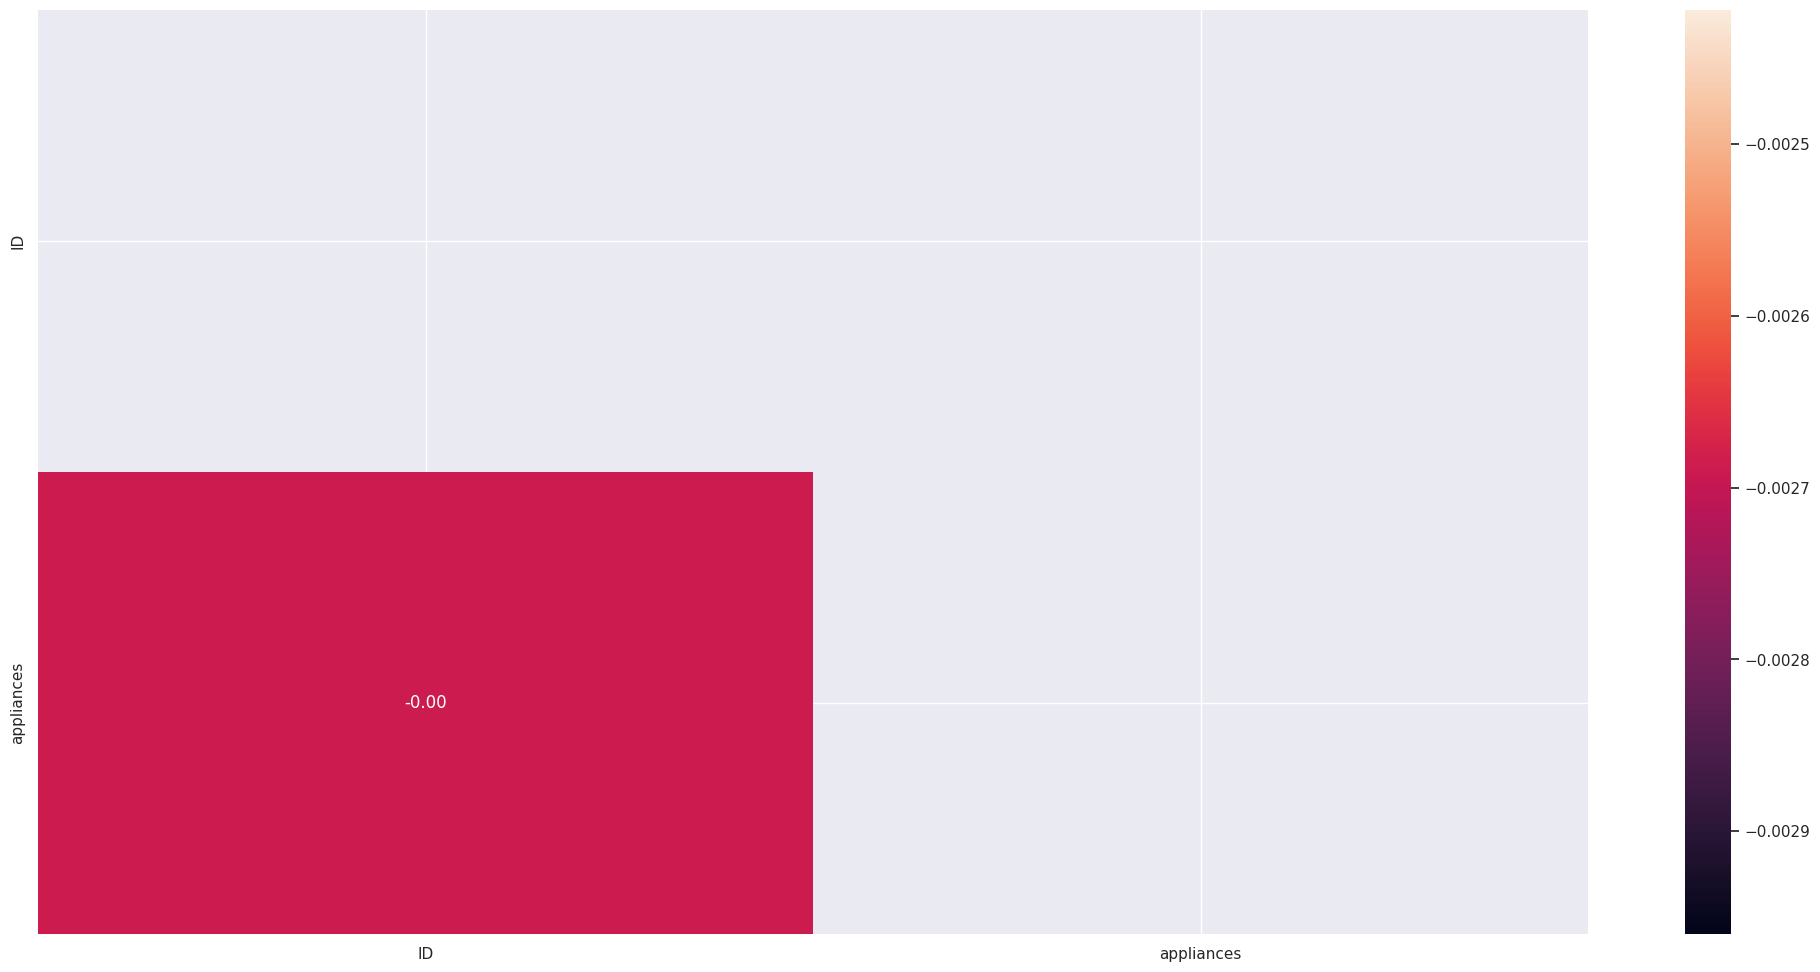

In [ ]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(method = 'spearman'), fmt = '.2f',  annot = True, mask = np.triu(df.corr()))
plt.savefig(f'corr-before-preprocessing.png')

In [ ]:
# lets start with the df_customer_demographic
print('Shape:', df.shape)

print('='*80)
print('Information about dataset \n',df.info(),'\n')

print('='*80)
print('Null Values')
missing_indices = set()
for index, row in df.iterrows():
    if row.isnull().any():
        missing_indices.add(index)
(len(missing_indices), df.isna().sum().sum()),df.isna().sum()

Shape: (3947, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          3947 non-null   int64  
 1   appliances  3947 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 61.8 KB
Information about dataset 
 None 

Null Values


((0, 0),
 ID            0
 appliances    0
 dtype: int64)

In [ ]:
print('='*80)
print('First 5 rows \n')
df.head()

First 5 rows 



,ID,appliances
0,8980,3.689
1,2754,3.689
2,9132,3.689
3,14359,3.689
4,8875,3.689


In [ ]:
print('='*80)
print('Describe the dataset \n')
df.describe()

Describe the dataset 



,ID,appliances
count,3947.000,3947.000
mean,9844.439,4.267
std,5634.240,0.561
min,0.000,3.689
25%,4979.000,3.912
50%,9708.000,4.094
75%,14731.500,4.605
max,19733.000,5.481


In [ ]:
print('Duplicates count:\t',df.duplicated().sum())

Duplicates count:	 0


In [ ]:
## Checking for skewness/outliers
print('Feature Skewness \n','='*80)
df.skew()

Feature Skewness 


,0
ID,0.023
appliances,0.893


In [ ]:
from scipy import stats
## Let's identify outliers, beyond 2 standard deviations from feature means
outlier_row_indices = set()
outlier_features = dict()
# Check if 'date' column exists before dropping it
if 'date' in df.columns:
    for column in df.drop(['ID','date'], axis =1).columns:
        z_scores = stats.zscore(df[column])
        outlier_row_indices.update(np.where(np.abs(z_scores) > 3)[0])
        outlier_features[column]=len(np.where(np.abs(z_scores) > 3)[0])
else:
    # If 'date' column doesn't exist, drop only 'ID'
    for column in df.drop(['ID'], axis=1).columns:
        z_scores = stats.zscore(df[column])
        outlier_row_indices.update(np.where(np.abs(z_scores) > 3)[0])
        outlier_features[column] = len(np.where(np.abs(z_scores) > 3)[0])

print('No ofrows with outlier attributes:\t',len(outlier_row_indices))
print('Percentage of rows with outlier attributes in dataset:',len(outlier_row_indices)/ df.shape[0])
print('\n', '='*80)
print('Feature wise outlier counts')
outlier_features

No ofrows with outlier attributes:	 0
Percentage of rows with outlier attributes in dataset: 0.0

Feature wise outlier counts


{'appliances': 0}

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).drop(['ID', 'lights', 'appliances'], axis=1, errors='ignore').columns.tolist()
# The above line selects all numeric columns and tries to drop mentioned columns
# If any of the columns to be dropped are not present, it will be ignored due to `errors='ignore'`


fig, axes = plt.subplots(nrows=20, ncols=4, figsize=(12, 50))

axes = axes.flatten()

for i, variable in enumerate(numerical_columns):
    sns.boxplot(x=df[variable], ax=axes[i])
    axes[i].set_title(variable)
#     plt.savefig(f'boxplot-{variable}.jpg')

if len(numerical_columns) < len(axes):
    for j in range(len(numerical_columns), len(axes)):
        fig.delaxes(axes[j])

fig.tight_layout()

plt.show()

<Figure size 1200x5000 with 0 Axes>

In [ ]:
## df
# Assuming your 'ID' column contains date and time information,
# and it's in a format like '2016-01-11 17:00:00'
df['date'] = pd.to_datetime(df['ID'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# errors='coerce' will handle any invalid date formats by setting them to NaT

# Now you can extract month, date, time, etc.
df['month'] = df['date'].dt.month
df['date_2'] = df['date'].dt.date
df['time'] = df['date'].dt.time
df['week'] = df['date'].dt.isocalendar().week  # Use isocalendar().week for ISO week number
df['day_num'] = df['date'].dt.dayofweek
# df['time'] = pd.to_datetime(df['date']).dt.time  # Redundant, removed
df['day_type'] = df['date'].dt.dayofweek.apply(lambda x: '0' if x < 5 else '1')
df['week_num'] = df['date'].dt.isocalendar().week  # Use isocalendar().week

df["hour"] = df["date"].dt.hour
df["weekday"] = df["date"].dt.weekday

In [ ]:
# Assuming 'ID' column in df_t contains date information
df_t['month'] = pd.to_datetime(df_t['ID'], errors='coerce').dt.month
df_t['date_2'] = pd.to_datetime(df_t['ID'], errors='coerce').dt.date
df_t['time'] = pd.to_datetime(df_t['ID'], errors='coerce').dt.time
df_t['week'] = pd.to_datetime(df_t['ID'], errors='coerce').dt.isocalendar().week
df_t['day_num'] = pd.to_datetime(df_t['ID'], errors='coerce').dt.dayofweek
# df_t['time'] = pd.to_datetime(df_t['date']).dt.time  # Redundant, removed
df_t['day_type'] = pd.to_datetime(df_t['ID'], errors='coerce').dt.dayofweek.apply(lambda x: '0' if x < 5 else '1')
df_t['week_num'] = pd.to_datetime(df_t['ID'], errors='coerce').dt.isocalendar().week

df_t["hour"] = pd.to_datetime(df_t["ID"], errors='coerce').dt.hour
df_t["weekday"] = pd.to_datetime(df_t["ID"], errors='coerce').dt.weekday

In [ ]:
col_temp = ["t1","t2","t3","t4","t5","t6","t7","t8","t9"]

col_hum = ["rh_1","rh_2","rh_3","rh_4","rh_5","rh_6","rh_7","rh_8","rh_9"]

col_weather = ["t_out", "tdewpoint","rh_out","press_mm_hg",
                "windspeed","visibility"]
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_time = ["hour", "weekday"]

col_target = ["appliances"]

In [ ]:
df[['day_num']].value_counts()

,count
day_num,


In [ ]:
len(df.columns)

12

In [ ]:
df.columns

Index(['ID', 'appliances', 'date', 'month', 'date_2', 'time', 'week',
       'day_num', 'day_type', 'week_num', 'hour', 'weekday'],
      dtype='object')

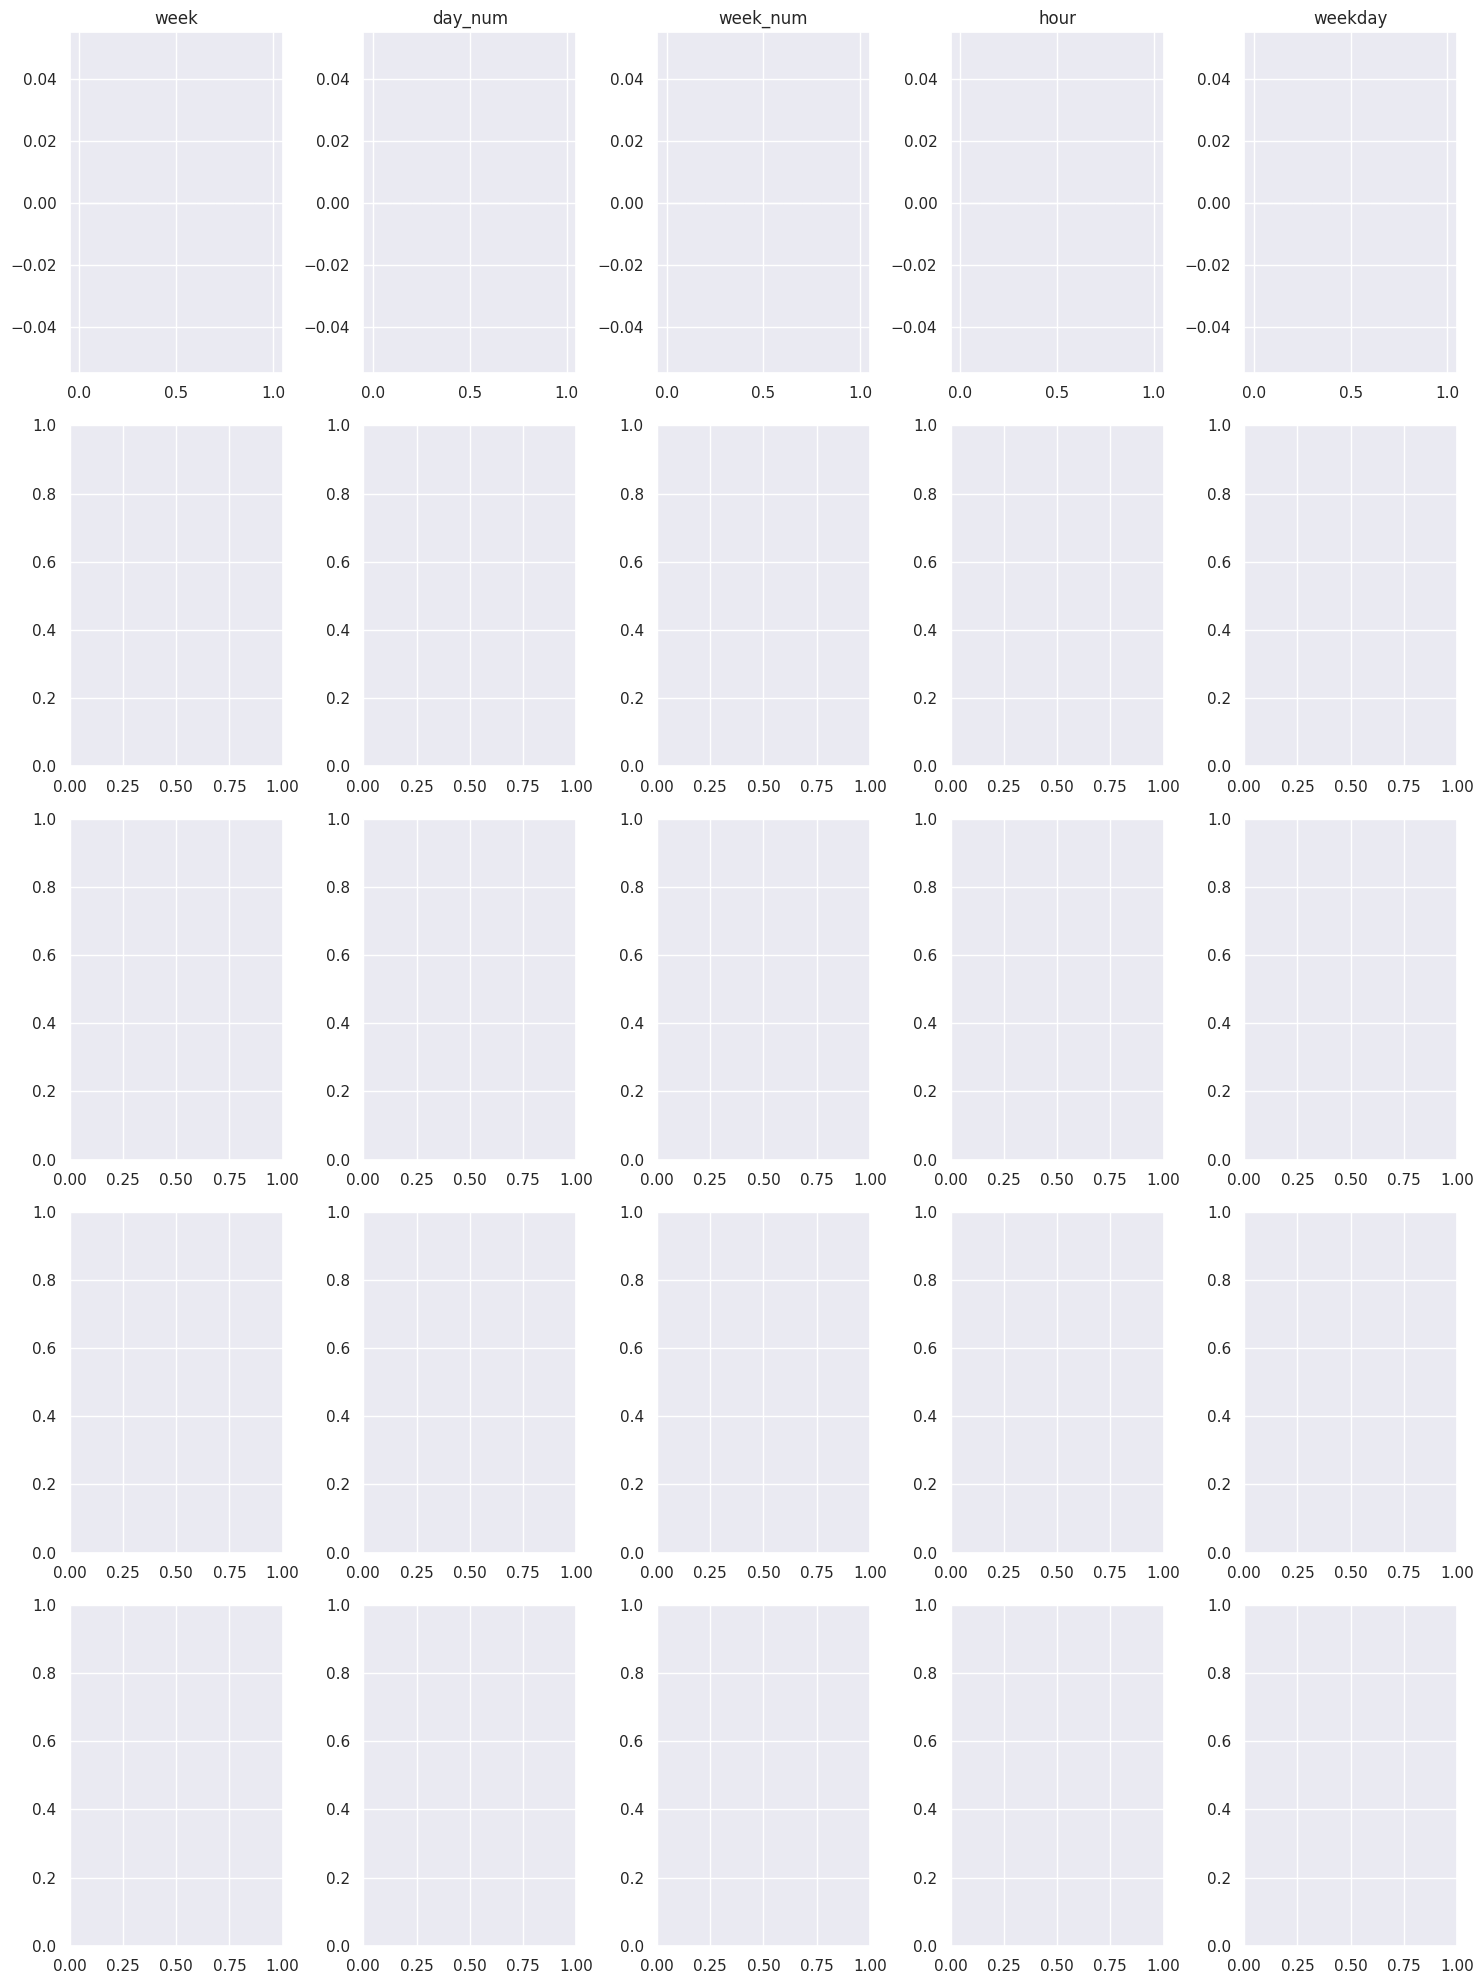

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).drop(['ID','month', 'lights', 'appliances'], axis=1, errors='ignore').columns.tolist()
# The above line selects all numeric columns and tries to drop mentioned columns
# If any of the columns to be dropped are not present, it will be ignored due to `errors='ignore'`


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 20))

axes = axes.flatten()

for i, variable in enumerate(numerical_columns):
    df[variable].hist(ax=axes[i])
    axes[i].set_title(variable)

fig.tight_layout()
plt.show()

In [ ]:
df[df['month']==1].groupby('date_2').agg({'appliances':'mean'}).appliances

,appliances
date_2,


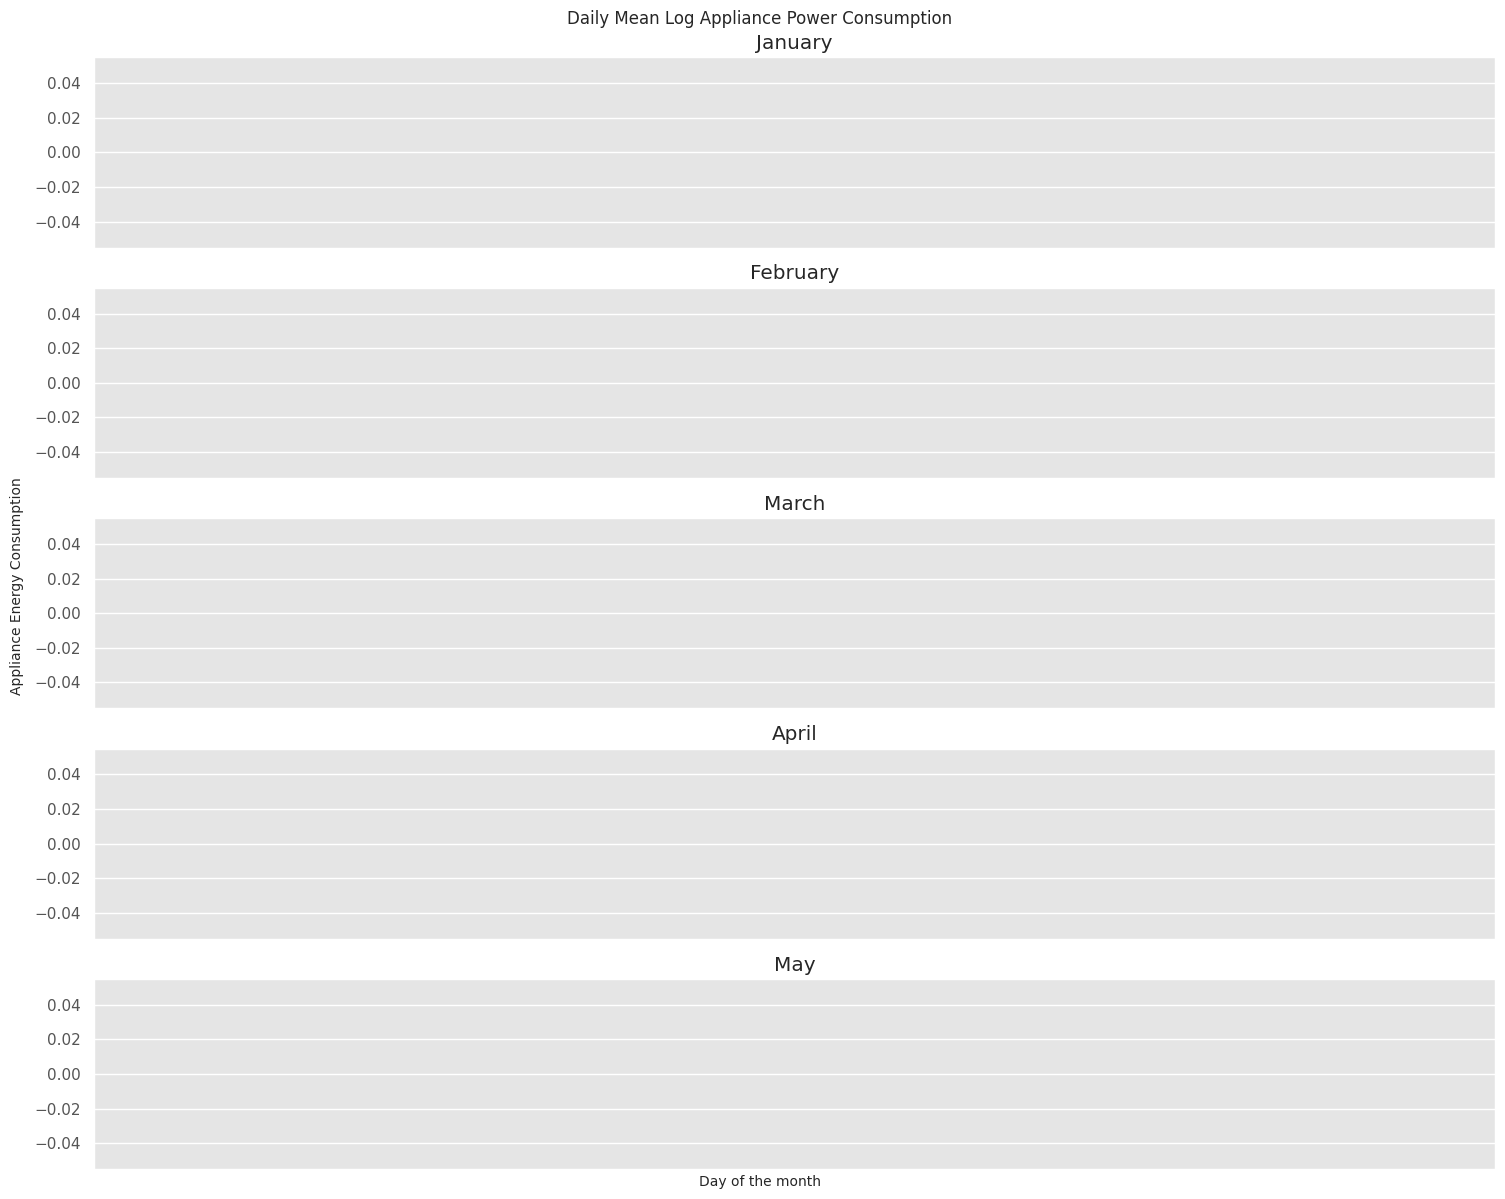

In [ ]:
plt.style.use('ggplot')
months = [1, 2, 3, 4, 5]
m_names = ['January', 'February', 'March', 'April', 'May']
subplots = [511, 512, 513, 514, 515]

fig, axs = plt.subplots(len(months), 1, figsize=(15, 12))

for i, (month, m_name) in enumerate(zip(months, m_names)):
    ax = axs[i]
    df_month = df[df['month'] == month]
    sorted_dates = sorted(list(df_month['date_2'].unique()))

    # Get the mean appliance values for the current month
    y = df_month.groupby('date_2').agg({'appliances': 'mean'}).appliances.to_list()

    ax.plot(sorted_dates, y, color='green', linewidth=1.7)
    ax.set_title(m_name)
# Set the x-axis tick positions and labels
    day_of_week_labels = [date.strftime('%a') for date in sorted_dates]
    day_of_month_labels = [date.day for date in sorted_dates]

    x_labels = \
    [f'{dow}\n{dom}' for dow, dom in zip(day_of_week_labels, day_of_month_labels)]
    # Concatenate labels

    ax.set_xticks(sorted_dates)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', rotation=0)

plt.suptitle('Daily Mean Log Appliance Power Consumption')
fig.text(0, 0.5, 'Appliance Energy Consumption', va='center', rotation='vertical')
fig.text(0.5, 0, 'Day of the month', ha='center')
plt.tight_layout()
plt.savefig('Daily Mean Log Appliance Power Consumption.png')
plt.show();


In [ ]:
df['hour'] = pd.to_datetime(df['date'], errors='coerce').dt.strftime('%H').astype(float).astype('Int64')

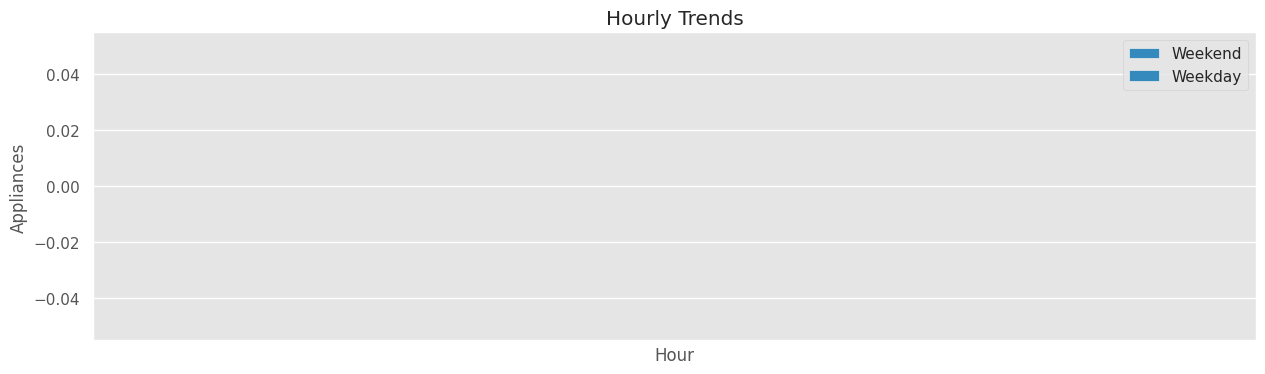

In [ ]:
WeekendDf = df[df.day_type == '1'].groupby('hour')['appliances'].median().reset_index()
WeekdayDf = df[df.day_type == '0'].groupby('hour')['appliances'].median().reset_index()


WeekendDf['appliances'] = np.exp(WeekendDf['appliances'])
WeekdayDf['appliances'] = np.exp(WeekdayDf['appliances'])

bar_width = 0.35

x = np.arange(len(WeekendDf['hour']))

fig, ax = plt.subplots(figsize=(15, 4))

ax.bar(x - bar_width/2, WeekendDf['appliances'], bar_width, label='Weekend')

ax.bar(x + bar_width/2, WeekdayDf['appliances'], bar_width, label='Weekday')

ax.set_xticks(x)
ax.set_xticklabels(WeekendDf['hour'])

ax.set_xlabel('Hour')
ax.set_ylabel('Appliances')
ax.set_title('Hourly Trends')

ax.legend()

plt.savefig(f'Weekend-vc-Weekday-hourly-trends.png')
plt.show()

In [ ]:
def corr_map(df, title, method='spearman', numeric_only = True, tick_size = 10, annot_size=8, annot_kws=8):
    mask = np.triu(np.ones_like(df.corr(numeric_only=numeric_only), dtype=bool))
    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only), fmt = '.2f',  annot = True, annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')#
    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)

    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.show();

In [ ]:
df['inv_log_appliance'] = np.exp(df['appliances'])

In [ ]:
df['appliances'].max(), df['inv_log_appliance'].max()

(5.48063892334199, 239.99999999999977)

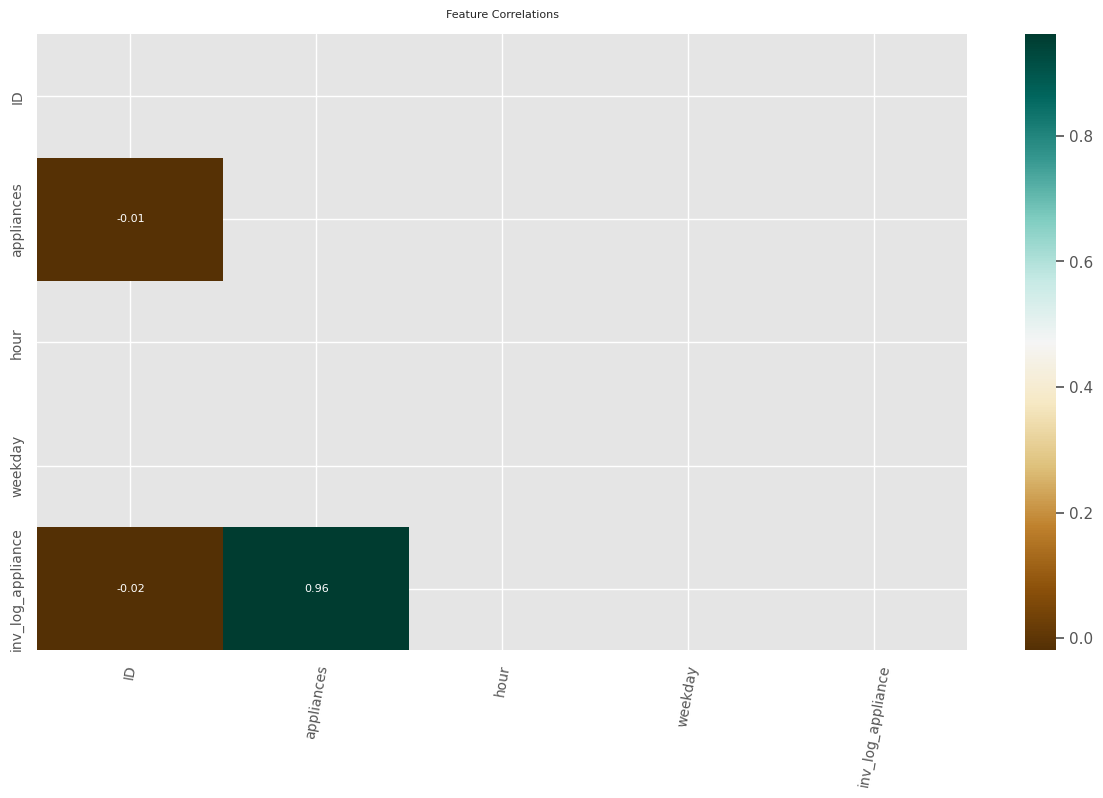

In [ ]:
corr_map(df.drop(['month', 'date_2', 'time','week','day_num', 'day_type', 'week_num'], axis =1), method='pearson' , title='Feature Correlations')

In [ ]:
# Ensure the columns exist in your DataFrame:
print(df.columns)  # Print the existing columns to identify any discrepancies

# Correct the column names if there are typos.
# For example, if the column is named 'T1' instead of 't1', change it to:
# df['temprature_inside'] = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']].mean(axis=1)

# If the columns are missing, you might need to reload your data or adjust
# your data processing steps to ensure they are included.

Index(['ID', 'appliances', 'date', 'month', 'date_2', 'time', 'week',
       'day_num', 'day_type', 'week_num', 'hour', 'weekday',
       'inv_log_appliance'],
      dtype='object')


In [ ]:
from sklearn import preprocessing, model_selection, metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

import time
from math import sqrt
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(df,test_size=0.25,random_state=40)

In [ ]:
# These features will be used to select the model, as it has train and test  split is available
feature_vars = col_temp + col_hum + col_weather +   col_time
target_vars = col_target


# We use below features after selecting the final model
model_features_vars = col_temp + col_hum + col_weather +  col_time
model_target_vars = col_target

In [ ]:
#Split training dataset into independent and dependent varibales
# Check if the columns exist in the train dataframe
print(train.columns)

# Assuming the columns in 'feature_vars' exist, but may have different casing:
train_X = train[[col for col in feature_vars if col in train.columns]]
train_y = train[[col for col in target_vars if col in train.columns]]

#Split testing dataset into independent and dependent varibales
test_X = test[[col for col in feature_vars if col in test.columns]]
test_y = test[[col for col in target_vars if col in test.columns]]

# We use below features after selecting the final model
model_train_X = train[[col for col in feature_vars if col in train.columns]]
model_train_y = train[[col for col in target_vars if col in train.columns]]

Index(['ID', 'appliances', 'date', 'month', 'date_2', 'time', 'week',
       'day_num', 'day_type', 'week_num', 'hour', 'weekday',
       'inv_log_appliance'],
      dtype='object')


In [ ]:
models = [
           ['Lasso', Lasso()],
           ['Ridge', Ridge()],
           ['K-Neighbors Regressor',  neighbors.KNeighborsRegressor()],
           ['SVR' , SVR(kernel='rbf')],
           ['Random Forest',RandomForestRegressor()],
           ['Extra Tree Regressor',ExtraTreesRegressor()],
           ['Gradient Boosting Classifier', GradientBoostingRegressor()] ,
           ['XGB Regressor', xgb.XGBRegressor()] ,
           ['MLP Regressor', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [ ]:
# These features will be used to select the model, as it has train and test  split is available
# Ensure these column names match the actual column names in your DataFrame
feature_vars = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9',
                'rh_1', 'rh_2', 'rh_3', 'rh_4', 'rh_5', 'rh_6', 'rh_7', 'rh_8', 'rh_9',
                't_out', 'tdewpoint', 'rh_out', 'press_mm_hg', 'windspeed', 'visibility',
                'hour', 'weekday']  # Assuming these are the correct column names

target_vars = ['appliances']


# We use below features after selecting the final model
model_features_vars = feature_vars  # Use the same features for the final model
model_target_vars = target_vars
#Split training dataset into independent and dependent varibales
# Check if the columns exist in the train dataframe
print(train.columns)

# Use the intersection of feature_vars and train.columns to get valid features
train_X = train[[col for col in feature_vars if col in train.columns]]
train_y = train[[col for col in target_vars if col in train.columns]]

# Use the intersection of feature_vars and test.columns to get valid features
test_X = test[[col for col in feature_vars if col in test.columns]]
test_y = test[[col for col in target_vars if col in test.columns]]

# We use below features after selecting the final model
model_train_X = train[[col for col in feature_vars if col in train.columns]]
model_train_y = train[[col for col in target_vars if col in train.columns]]


Index(['ID', 'appliances', 'date', 'month', 'date_2', 'time', 'week',
       'day_num', 'day_type', 'week_num', 'hour', 'weekday',
       'inv_log_appliance'],
      dtype='object')


In [ ]:
# These features will be used to select the model, as it has train and test split available
# Ensure these column names match the actual column names in your DataFrame
feature_vars = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9',
                'rh_1', 'rh_2', 'rh_3', 'rh_4', 'rh_5', 'rh_6', 'rh_7', 'rh_8', 'rh_9',
                't_out', 'tdewpoint', 'rh_out', 'press_mm_hg', 'windspeed', 'visibility',
                'hour', 'weekday']  # Assuming these are the correct column names

target_vars = ['appliances']

# We use below features after selecting the final model
model_features_vars = feature_vars  # Use the same features for the final model
model_target_vars = target_vars

# Split training dataset into independent and dependent variables
# Check if the columns exist in the train dataframe
print(train.columns)

# Ensure all feature_vars are present in train.columns, handling case sensitivity
train_X = train[[col for col in feature_vars if col.lower() in [c.lower() for c in train.columns]]]
# Get corresponding columns from train using a case-insensitive comparison

train_y = train[[col for col in target_vars if col.lower() in [c.lower() for c in train.columns]]]

# Split testing dataset into independent and dependent variables
test_X = test[[col for col in feature_vars if col.lower() in [c.lower() for c in test.columns]]]
test_y = test[[col for col in target_vars if col.lower() in [c.lower() for c in test.columns]]]

# We use below features after selecting the final model
model_train_X = train[[col for col in feature_vars if col.lower() in [c.lower() for c in train.columns]]]
model_train_y = train[[col for col in target_vars if col.lower() in [c.lower() for c in train.columns]]]

Index(['ID', 'appliances', 'date', 'month', 'date_2', 'time', 'week',
       'day_num', 'day_type', 'week_num', 'hour', 'weekday',
       'inv_log_appliance'],
      dtype='object')


In [ ]:
# These features will be used to select the model, as it has train and test split available
# Ensure these column names match the actual column names in your DataFrame
feature_vars = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9',
                'rh_1', 'rh_2', 'rh_3', 'rh_4', 'rh_5', 'rh_6', 'rh_7', 'rh_8', 'rh_9',
                't_out', 'tdewpoint', 'rh_out', 'press_mm_hg', 'windspeed', 'visibility',
                'hour', 'weekday']  # Assuming these are the correct column names

target_vars = ['appliances']

# We use below features after selecting the final model
model_features_vars = feature_vars  # Use the same features for the final model
model_target_vars = target_vars

# Split training dataset into independent and dependent variables
# Check if the columns exist in the train dataframe
print(train.columns)

# Ensure all feature_vars are present in train.columns, handling case sensitivity
train_X = train[[col for col in feature_vars if col.lower() in [c.lower() for c in train.columns]]]
# Get corresponding columns from train using a case-insensitive comparison

train_y = train[[col for col in target_vars if col.lower() in [c.lower() for c in train.columns]]]

# Split testing dataset into independent and dependent variables
test_X = test[[col for col in feature_vars if col.lower() in [c.lower() for c in test.columns]]]
test_y = test[[col for col in target_vars if col.lower() in [c.lower() for c in test.columns]]]

# We use below features after selecting the final model
model_train_X = train[[col for col in feature_vars if col.lower() in [c.lower() for c in train.columns]]]
model_train_y = train[[col for col in target_vars if col.lower() in [c.lower() for c in train.columns]]]

Index(['ID', 'appliances', 'date', 'month', 'date_2', 'time', 'week',
       'day_num', 'day_type', 'week_num', 'hour', 'weekday',
       'inv_log_appliance'],
      dtype='object')


In [ ]:
xtr = ExtraTreesRegressor(criterion='poisson',max_depth=100,max_features='log2', n_estimators=350,n_jobs=-1,random_state=40)
xtr.fit(model_train_X,model_train_y)

ExtraTreesRegressor(criterion='poisson', max_depth=100, max_features='log2',
                    n_estimators=350, n_jobs=-1, random_state=40)

In [ ]:
metrics.r2_score(test_y,xtr.predict(test_X))

-4.746912648956325e-06

In [ ]:
# In the cell where you are creating model_test_X:
# Assuming 'ID' column is in df_t
df_t['date'] = pd.to_datetime(df_t['ID'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Create the features in df_t
df_t['month'] = df_t['date'].dt.month
df_t['date_2'] = df_t['date'].dt.date
df_t['time'] = df_t['date'].dt.time
df_t['week'] = df_t['date'].dt.isocalendar().week
df_t['day_num'] = df_t['date'].dt.dayofweek
df_t['day_type'] = df_t['date'].dt.dayofweek.apply(lambda x: '0' if x < 5 else '1')
df_t['week_num'] = df_t['date'].dt.isocalendar().week
df_t["hour"] = df_t["date"].dt.hour
df_t["weekday"] = df_t["date"].dt.weekday

# ... (other feature engineering steps for df_t) ...

# Now select the features for prediction:
# Now select the features for prediction, ensuring they exist in df_t:
model_test_X = df_t[[col for col in col_temp + col_hum + col_weather + col_time
                    if col in df_t.columns]]
# Using list comprehension to get common columns

In [ ]:
import os

# ... (your existing code) ...

# Create the directory if it doesn't exist
os.makedirs('/kaggle/working', exist_ok=True)

# Now save the DataFrame to CSV
sub_xtree.to_csv("/kaggle/working/sub_xtree.csv", index=False)

In [ ]:
sub_xtree.head()

,ID,appliances
0,8980,4.267
1,2754,4.267
2,9132,4.267
3,14359,4.267
4,8875,4.267
